# HERRAMIENTAS BÁSICAS PARA IMPORTAR, TRANSFORMAR Y VISUALIZAR DATOS

Maialen Iturbide 

miturbide@ifca.unican.es

<img src="figs/data-science-explore.png" caption="fuente: Wickham and Grolemund, 2018" />

![manualRdatascience](figs/manual_R_for_Data_Science.jpg)

http://r4ds.had.co.nz/index.html


***
## CONTENIDOS
### Visualizar 
### Transformar 
### Importar/Exportar
### Ordenar
### Caso de estudio
***

## ANTES DE EMPEZAR...UNA INTRODUCCIÓN A **KAGGLE**


Kaggle es una plataforma Web que reune a la mayor comunidad de data sciencetists del mundo: https://www.kaggle.com/

Kaggle ofrece:
 
 * **Competiciones de Machine learning:** Este fue el primer producto de Kaggle. Las Compañías publican problemas y los participantes compiten para construir el mejor algoritmo que dé solución al problema planteado.
 * **Kernels:** Son notebooks y scripts de python o de R que la comunidad comparte.
 * **Datasets públicos:** Los miembros de la comunidad comparten conjuntos de datos.
 * **Kaggle Learn:** ofrece cursos para aprender o mejorar en data science (e.g. python, machine learning, visualización de datos...)

![](figs/kaggle_learn.png)





***

## **VISUALIZAR DATOS**
### (Dataset de ejemplo: *Iris de Fisher* y *mpg*)

La **visualización** se trata de crear **"plots"** o gráficos informativos que ayuden a **entender los datos**.

En esta sección utilizaremos el **dataset de Iris de Fisher** (también llamado dataset de Iris de Anderson) (https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="figs/iris_setosa.jpg" width= "250"/> <img src="figs/iris_virginica.jpg" width= "220"/> <img src="figs/iris_versicolor.jpg" width= "240"/> 

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (**Iris setosa**, **Iris virginica** e **Iris versicolor**). Se midieron cuatro rasgos de cada muestra: **El largo y ancho de los sépalos y el largo y ancho de los pétalos**. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Este dataset se encuentra en formato **csv** en kaggle (https://www.kaggle.com/uciml/iris).

Lo podemos leer (una vez descargado) en nuestra sesión de R con la función `read.csv` o `read.table`:



In [1]:
iris.kagg <- read.table(file = "data/Iris.csv", sep = ",", header = TRUE)
str(iris.kagg)

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...



Este dataset también se encuentra disponible en el paquete `datasets` de R:


In [ ]:
library(help = "datasets")

In [ ]:
?iris

Podemos ver la estructura de `iris` con la función `str()`:

In [ ]:
str(iris)

Fijándonos en la estructura de ambos data.frames (objetos iris.kagg e iris), vemos que la versión de _iris_ de kaggle tiene una variable más (ID).

La función de visualización básica de R es `plot` (`?plot` para acceder a la ayuda). 

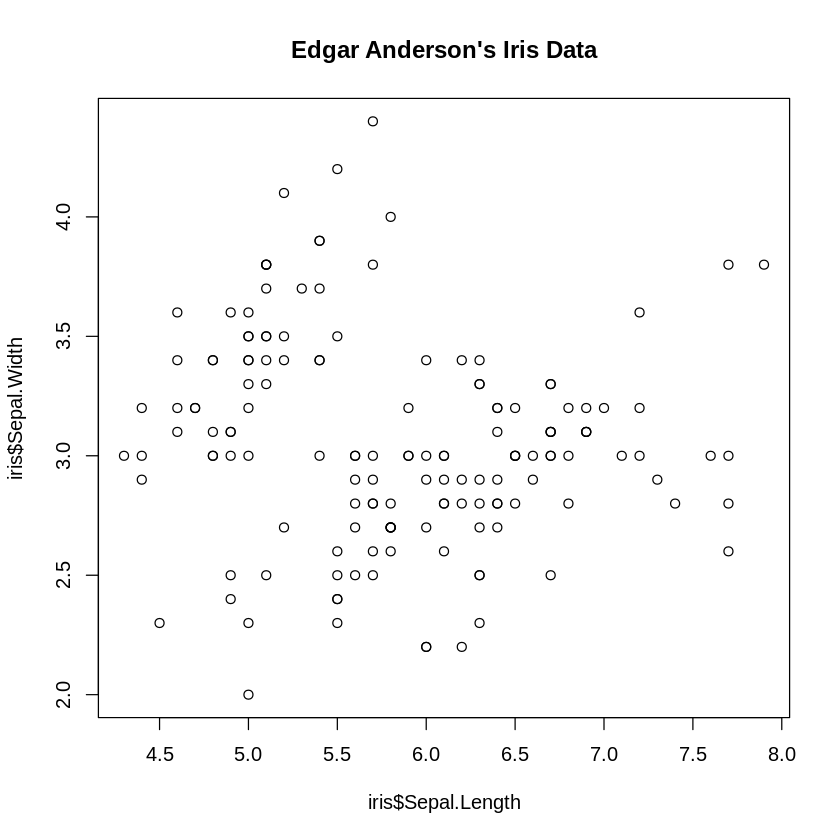

In [2]:
plot(iris$Sepal.Length, iris$Sepal.Width, 
main="Edgar Anderson's Iris Data")

Visualicemos por ejemplo esta misma gráfica pero **diferenciando con colores las diferentes especies de Iris**. Para ello realizaremos una pequeña transformación de los datos en los pasos que se muestran a continuación.

La función `levels()` nos devuelve las especies que recoge el conjunto de datos:

In [3]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [4]:
# Extraigo los datos que corresponden únicamente a la especie de Iris setosa
ind <- which(iris$Species == "setosa")
str(iris[ind, ])

# La función `subset` nos permite hacer lo mismo en un solo paso
setosa <- subset(iris, Species == "setosa")
str(setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Si aplicamos `subset()` para cada una de las especies, mediante las funciones `plot` y `points` podemos diferenciarlas en un mismo gráfico:

In [5]:
versicolor <- subset(iris, Species == "versicolor")
virginica <- subset(iris, Species == "virginica")

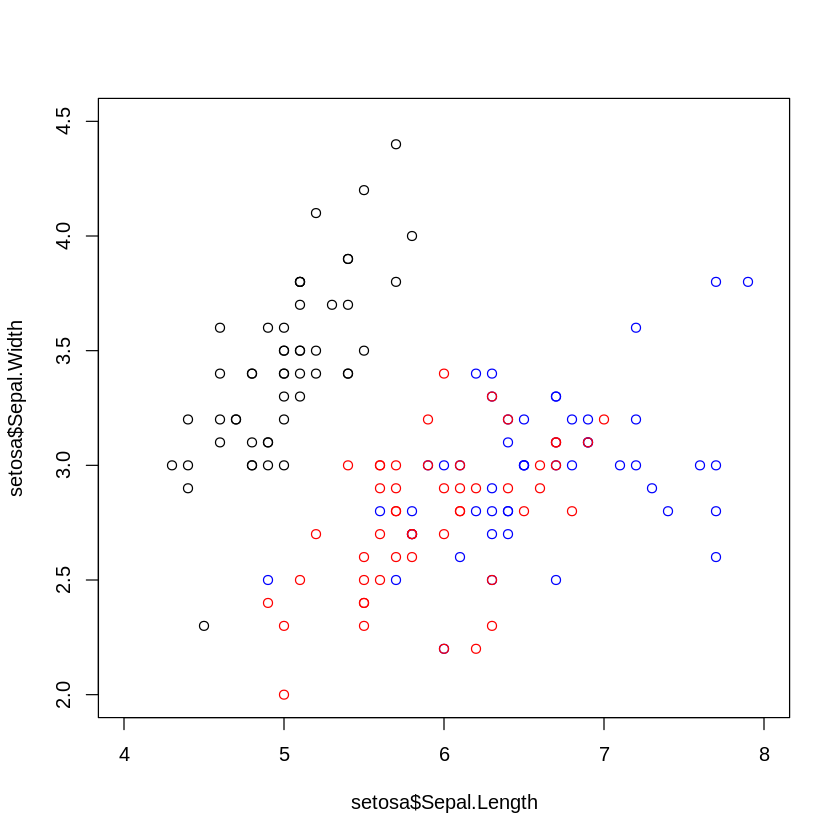

In [6]:
plot(setosa$Sepal.Length, setosa$Sepal.Width, xlim = c(4, 8), ylim = c(2, 4.5))
points(virginica$Sepal.Length, virginica$Sepal.Width, col = "blue")
points(versicolor$Sepal.Length, versicolor$Sepal.Width, col = "red")

Para este caso concreto, la transformación de arriba no es necesaria, ya que podemos pasarle al argumento `col` la variable `Species`:

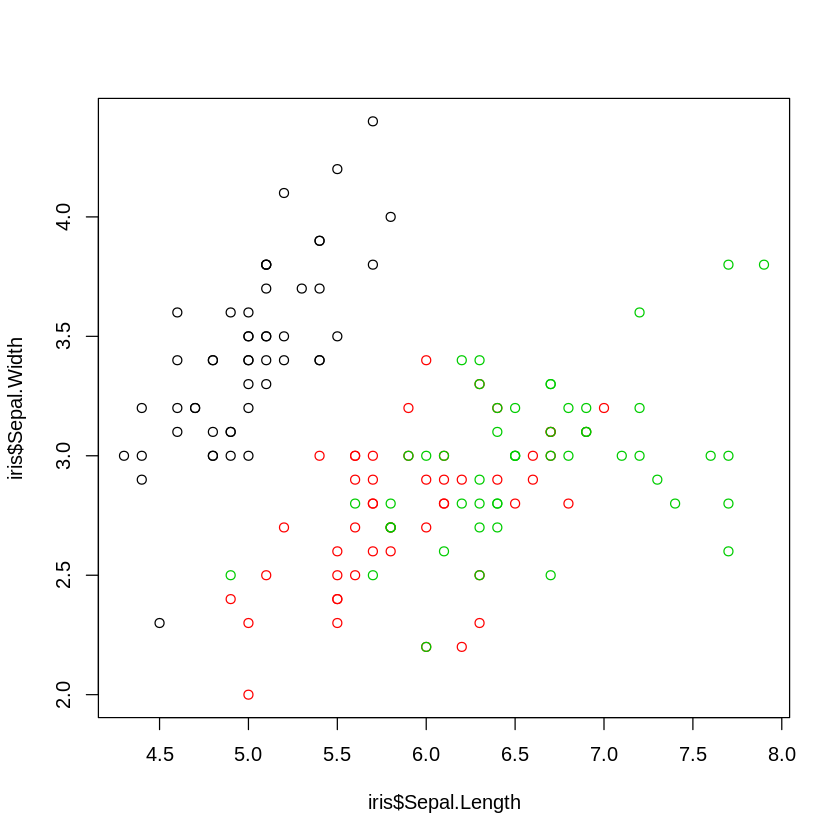

In [7]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

Existen librerías más potentes para la visualización de datos, por ejemplo, `ggplot` o **`lattice`**:

In [8]:
install.packages("lattice")

Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


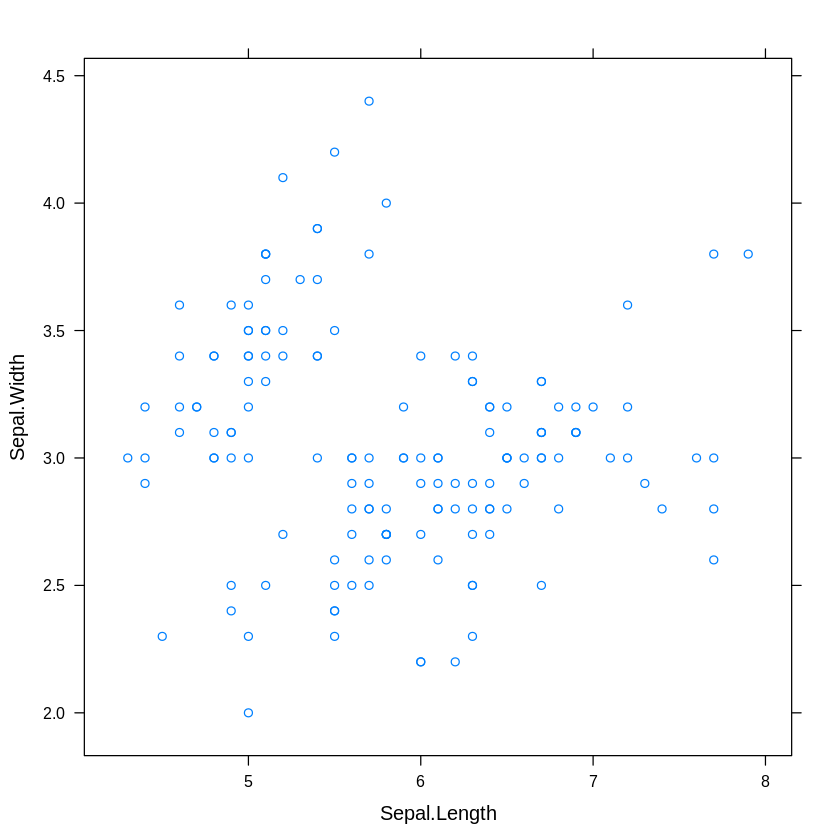

In [9]:
library(lattice)
xyplot(Sepal.Width~Sepal.Length, data = iris)

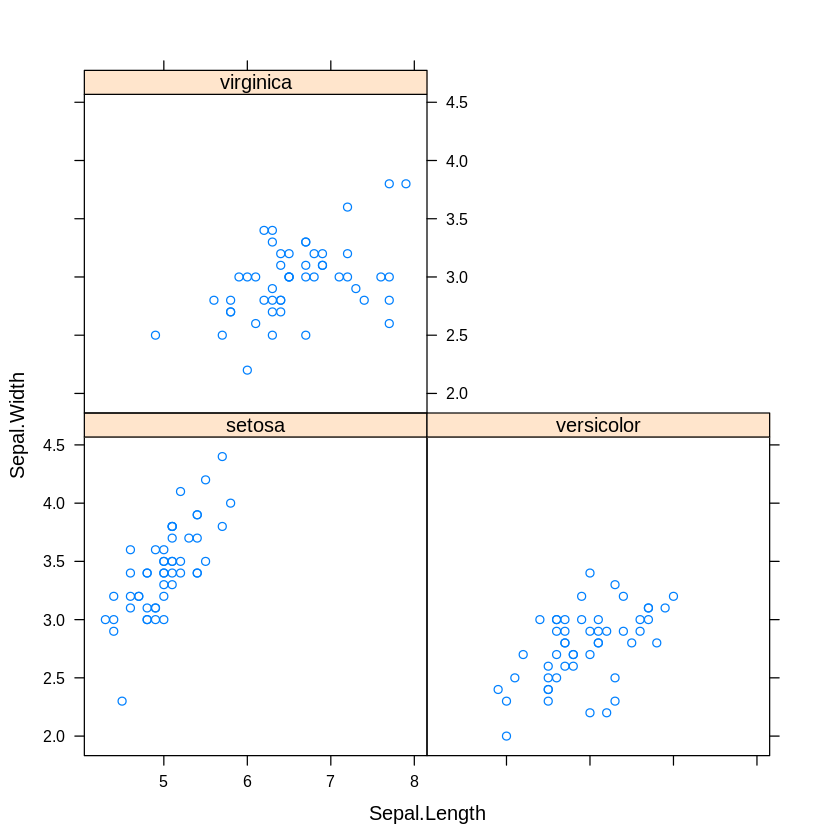

In [10]:
xyplot(Sepal.Width~Sepal.Length|Species, data = iris)

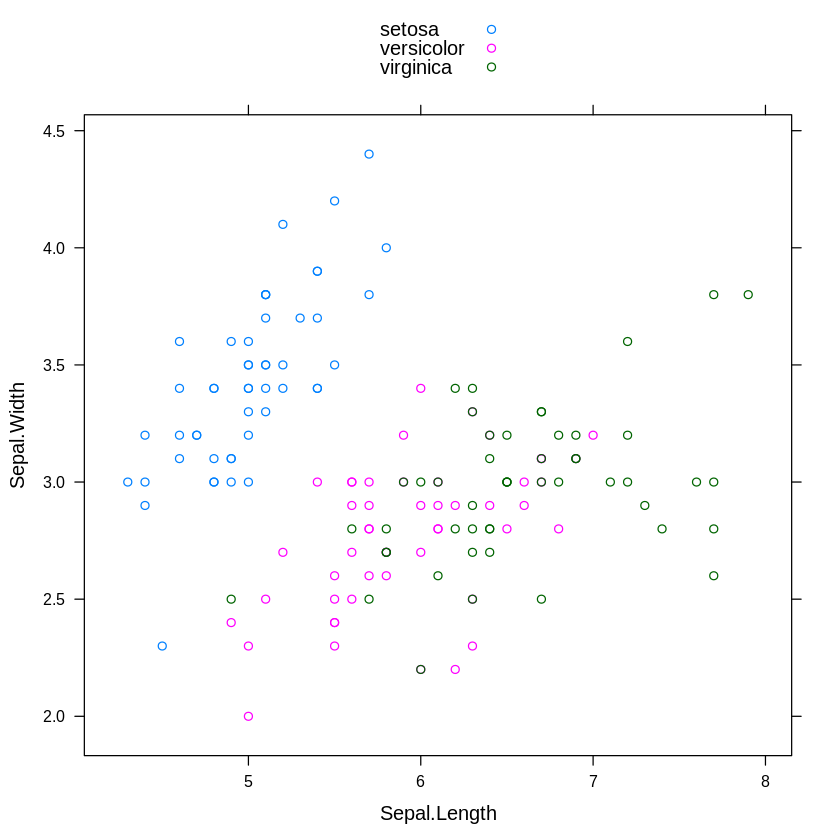

In [11]:
xyplot(Sepal.Width~Sepal.Length, group = Species, data = iris, auto.key = TRUE)

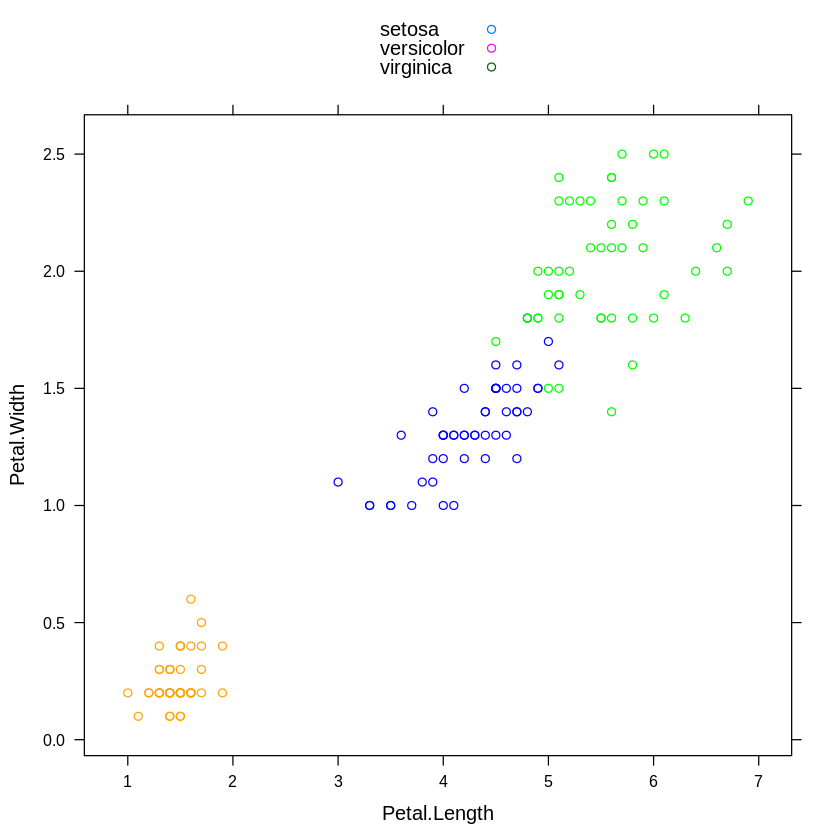

In [12]:
xyplot(Petal.Width~Petal.Length, group = Species, data = iris, 
       auto.key = TRUE, 
       col = c("orange", "blue", "green"))

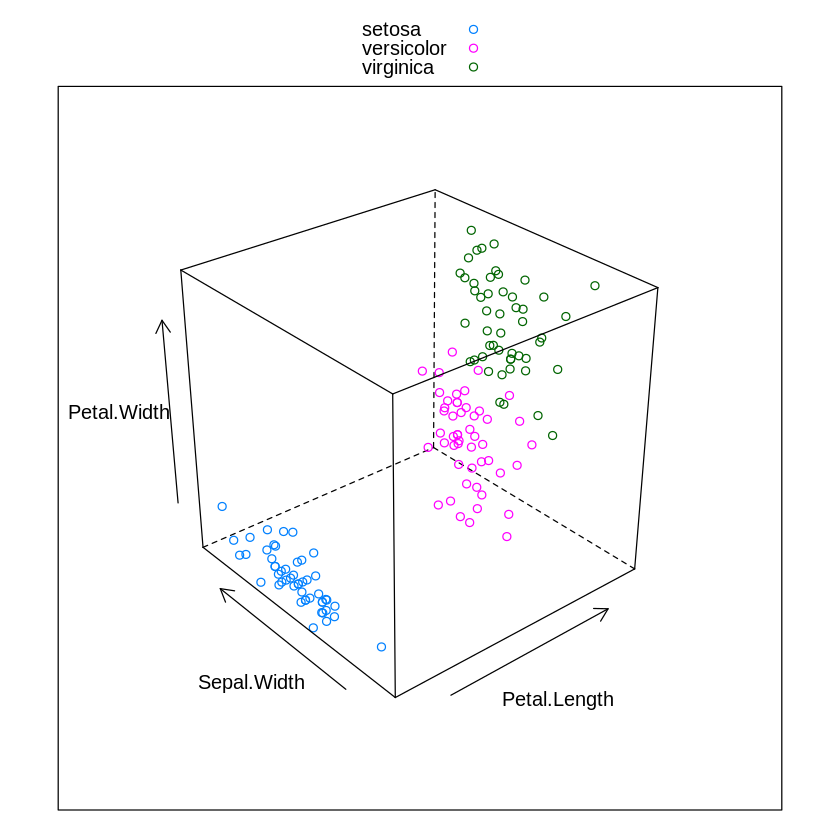

In [13]:
cloud(Petal.Width ~ Petal.Length * Sepal.Width, group = Species, data = iris, auto.key = TRUE)

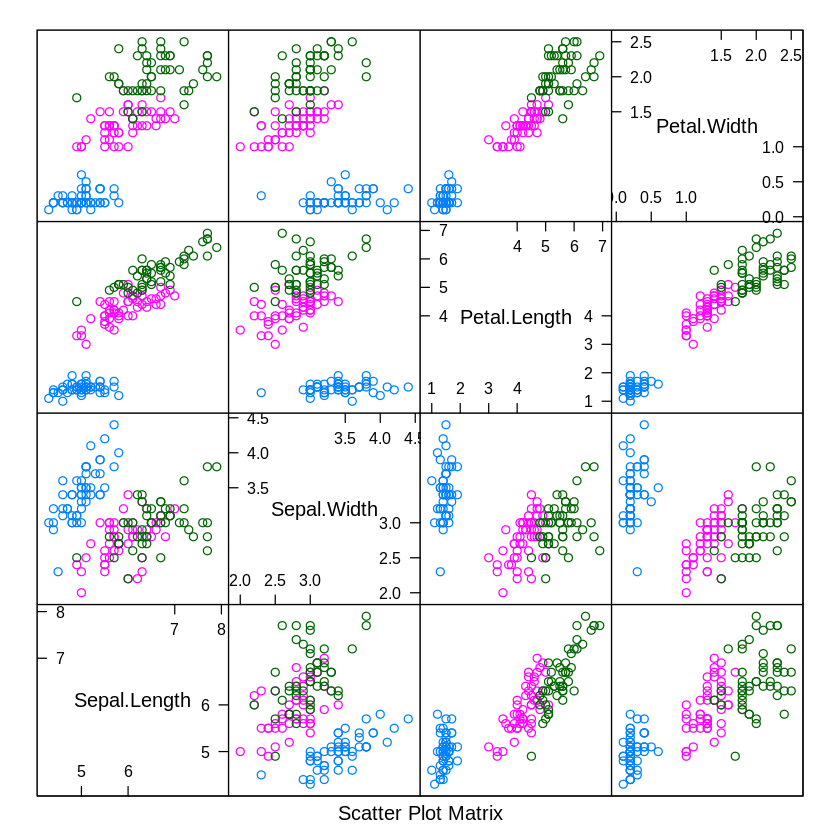

In [14]:
splom(~iris[1:4], groups = Species, data = iris)

In [ ]:
bwplot(Petal.Length~Species, data = iris)

## El paquete **tidyverse**
### Datasets de ejemplo: *Iris de Fisher* y *mpg*

In [ ]:
install.packages("tidyverse")

In [ ]:
library(tidyverse)


 
 La librería tidyverse carga a su vez las siguientes librerías o paquetes: 
   * **ggplot2**, para visualizar datos.
   * **dplyr**, para manipular datos.
   * **tidyr**, para ordenar datos.
   * **readr**, para importar datos.
   * **purrr**, para programar funciones.
   * **tibble**, para `tibbles`, una versión moderna de los `data.frames`.
   * **stringr**, para cadenas de caracteres (character strings).
   * **forcats**, para factores.
   
 En el siguiente ejemplo utilizamos **`ggplot()` (paquete `ggplot2`) para visualizar** los datos de _iris_.
 
 **Se comienza una gráfica con la función `ggplot()`**, que crea un sistema de coordenadas al que **se pueden agregar capas con el operador `+`**. `ggplot(data = mpg)` crea un gráfico vacío y se completa, en este ejemplo, con otra capa de puntos, la generada por la función `geom_point`:

install.packages("ggplot2");
install.packages("dplyr");
install.packages("tidyr");
install.packages("readr");
install.packages("tibble");
library("ggplot2");
library("dplyr");
library("tidyr");
library("readr");
library("tibble")


In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)
library(tibble)

In [ ]:
ggplot(data = iris) +
geom_point(mapping = aes(x=Petal.Width, y=Petal.Length))

In [ ]:
ggplot(data = iris, aes(Species, Petal.Length)) +
geom_boxplot()

In [ ]:
# tenemos la opción de convertir el data.frame a tibble
iris <- as_tibble(iris)

De aquí en adelante utilizaremos el dataset *mpg* incluido en el paquete *ggplot2*:

In [ ]:
data(package = "ggplot2")

---
### Pŕactica 1

¿que classe de objeto es `mpg`? ¿cuántas columnas y filas tiene? ¿cuántas variables? ¿de qué tipo? ¿Cuál es la descripción de cada variable? (escribe las líneas de código en la siguiente celda)

In [ ]:
# Visualiza la estructura de `mpg`

# Accede a la página de ayuda del dataset


Nos fijaremos en dos variables:
* `displ`, tamaño del motor del coche en litros
* `hwy`, la eficiencia de combustible en millas por galón (1 mpg =  4.5 litros). Un automóvil con una eficiencia de combustible baja consume más combustible que un automóvil con una eficiencia alta cuando recorren la misma distancia.

Utiliza `ggplot` para visualizar una variable frente a la otra en la siguiente celda.

In [ ]:
# ggplot(...) + geom_point(...)


¿qué podemos decir de estas dos variables?
¿La relación entre ambas es negativa o positiva? ¿que conclusión sacamos?

---

Para **asociar un parámetro estético a una variable** añadimos el nombre de ese parámetro (o argumento) en `aes()`.

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) 

Los colores revelan que muchos de los puntos inusuales (rojo) son coches de dos plazas. A primeras, nadie diría que un coche de este tipo es híbrido... ¡son coches deportivos! que tienen motores grandes como los SUV y las Pickup, pero son pequeños, lo que mejora su consumo de combustible.

---
### Práctica 2

1) ¿Que tipo de variable es `class`? Elige una variable continua y crea un gráfico de la misma en función de las variables `displ` y `hwy` 
¿Cómo se comportan los estéticos para variables continuas en comparación a las categóricas?


In [ ]:
# ggplot ...



2) Crea un gráfico de puntos (`displ` vs `hwy`) con `ggplot` donde los puntos se diferencien por color (`color`) para una variable categórica y por tamaño de punto (`size`) para una variable continua (e.g.`cty`).

In [ ]:
#ggplot(...

3) ¿Qué ocurre cuando intentamos diferenciar los puntos por forma (`shape`) en base a una variable continua (e.g. `cty`)?

In [ ]:
# ggplot...



---

In [ ]:
ggplot(mpg, aes(x = displ, y = hwy, color = class, shape= cty > 20)) +
geom_point()

Otra estrategia útil para diferenciar grupos de puntos es utilizar `facet_wrap()` como una capa de ggplot más.

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~class, nrow = 2)

## **Transformar datos**
### (Dataset de ejemplo: *flights*)

La visualización es una herramienta importante para la generación de información, pero es raro obtener los datos en la forma en la que se necesita. A menudo, habrá que crear nuevas variables o resúmenes, o tal vez solo cambiar el nombre de las variables o reordenar las observaciones.... para que sea más fácil trabajar con los datos.

Continuando con el uso de los paquetes de `tidyverse`, **utilizaremos el paquete `dplyr`** para transformar el dataset `flights` (flights departing New York City in 2013).

In [ ]:
load("data/flights.rda")

In [ ]:
str(flights)

Las **cinco funciones clave de `dplyr`** que te permiten resolver la gran mayoría de los problemas de manipulación de datos:

  * **filter()**,  Extraer subconjuntos de datos en función de sus valores.
  * **arrange()**, Reordenar filas.
  * **select()**, Extraer variables por su nombre.
  * **mutate()**, Crear nuevas variables con funciones de las variables existentes.
  * **summarise()**, Collapse many values down to a single summary.


### **Filtrar filas**

Mediante el uso de los operadores comparativos: >, >=, <, <=, != (no igual), == (igual)

In [ ]:
jan1 <- filter(flights, month == 1, day == 1)
str(jan1)

In [ ]:
day1 <- filter(flights, month != 2, day == 1)
ggplot(day1, aes(x = month, y = dep_delay, group = month)) +
geom_boxplot(width=0.6, na.rm = TRUE)

In [ ]:
month2 <- filter(flights, month == 5 | month == 7, day == 1)
ggplot(month2, aes(x = month, y = dep_delay, group = month)) +
geom_boxplot(width=0.6, na.rm = TRUE)

### **Ordenar filas**

In [ ]:
bydate <- arrange(flights, year, month, day)
bydelay <- arrange(flights, desc(dep_delay))
ggplot(flights) +
geom_point(aes(1:nrow(flights), dep_delay)) +
geom_point(aes(1:nrow(flights), bydelay$dep_delay), color = "red")

---
### Practica 3
1) Utiliza `filter()` y `is.na()` (en lugar de un operador comparativo) para saber cuantos vuelos no contienen datos de hora de salida.
 
2) ¿Qué vuelos tuvieron trayectos más largos? ¿y los más cortos? utiliza `arrange()`.


In [ ]:
# arrange(...

---

### **Seleccionar columnas**



In [ ]:
# Seleccionar por el nombre de la columna
print(select(flights, year, month, day))

# Seleccionar todas las columnas entre "year" y "day"
print(select(flights, year:day))

# Seleccionar todas las columnas excepto las que están entre "year" y "day"
print(select(flights, -(year:day)))




Hya una serie de funciones "helper" que pueden utilizarse dentro de la función `select()`:

   
   * `starts_with("abc")`

   * `ends_with("xyz")`

   * `contains("ijk")`

   * `matches("(.)\\1")`

   * `num_range("x", 1:3)`

In [ ]:
flight_times <- select(flights, ends_with("time"))
str(flight_times)

Otra función "helper" muy útil es `everything()`

In [ ]:
df <- select(flights, time_hour, air_time, everything())
str(df)

### **Añadir nuevas variables**

Además de seleccionar conjuntos de columnas existentes, a menudo es útil agregar nuevas columnas que son funciones de columnas existentes. Ese es el trabajo de `mutate()`.

`mutate()` siempre agrega nuevas columnas al final de su conjunto de datos, por lo que utilizaremos un subconjunto de `fights` (usando `select()`) para que podamos ver las nuevas variables. 

In [ ]:
flights_sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)

mutate(flights_sml,
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
)

¿Qué ocurre con los `NA` del final?

---

## IMPORTAR Y EXPORTAR (LEER Y ESCRIBIR) DATOS

### (Dataset de ejemplo: *Iris de Fisher* y *flights*)

Trabajar con los datos proporcionados por los paquetes de R es una excelente manera de aprender las herramientas de data science, pero en algún momento necesitaréis comenzar a trabajar con vuestros propios datos.

Utilizaremos el **paquete `readr`**, que es también parte de `tidyverse`.


### Leer datos
La mayoría de las funciones de lectura convierten archivos planos en data frames:


* `read_csv()` lee archivos delimitados por comas, `read_csv2()` lee archivos separados por punto y coma, `read_tsv()` lee archivos delimitados por tabulaciones, y `read_delim()` lee archivos con cualquier delimitador.

* `read_fwf()` lee archivos de ancho fijo. Puede especificar campos por su ancho con `fwf_widths()` o su posición con `fwf_positions()`. `read_table()` lee una variación común de archivos de ancho fijo donde las columnas están separadas por espacios en blanco.

* `read_log()` reads Apache style log files (ver https://www.screamingfrog.co.uk/an-seos-guide-to-apache-log-files/)




In [ ]:
iris <- read_csv("data/Iris.csv")
str(iris)

También podemos pasar a `read_csv` un csv que generemos "al vuelo" en R: 

In [ ]:
read_csv("a,b,c
1,2,3
4,5,6")

A veces hay algunas líneas de metadatos en la parte superior del archivo:
* El argumento `skip = n` se usa para omitir las primeras n líneas. 
* El argumento `comment = "#"` se usa para eliminar todas las líneas que comienzan con (por ejemplo #)

In [ ]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

In [ ]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

Es posible que los datos no tengan nombres de columna. Puedes usar `col_names = FALSE`. (`\n` se puede usar para agregar una nueva línea).

In [ ]:
read_csv("1,2,3\n4,5,6", col_names = FALSE)

Puedes pasar a `col_names` un vector de caracteres que se usará como nombres de columna:

In [ ]:
read_csv("1,2,3\n4,5,6", col_names = c("x", "y", "z"))

El argumento `na` se usa para especificar qué valor (o valores) del archivo son "missing values":

In [ ]:
read_csv("a,b,c\n1,2,.", na = ".")

Las principales ventajas de `read_csv` frente a `read.csv` (de base de R) son:
* Es más rápido.
* Importa los datos a un objeto de clase `tibble`. De manera que...
    - No convierte los "character" a "factor" for defecto
    - No usa nombres de filas
    - No transforma los nombres de columna

---

### Práctica 4

¿Qúe función de importación utilizarías para un archivo separado por "|" (e.g. "a|b|c\n1|2|3")? Escribe un ejemplo a continuación:

Identifica qué está mal en los siguientes archivos CSV y corrígelo:

In [ ]:
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a;b\n1;3")


---

### Escribir datos

`readr` incluye tres funciones útiles para escribir datos en disco: `write_csv()`, `write_delim()` `write_tsv()`

---

### Práctica 5

Exporta el dataset `flights` al directorio que quieras (utiliza `?write_csv` como ayuda).

In [ ]:
# write_...

---

## ORDENAR DATOS

### (Datasets de ejemplo: *table1*, *table2*, *table3*, ... y *flights*)

A veces nos tenemos que enfrentar a datasets desordenados y complejos. **El paquete `tidyr` ofrece herramientas que ayudan a ordenar datos.** 
Los datos que utilizaremos en esta sección se incluyen en el paquete `tidyr` (e.g. `table1`, `table2`, ...)

In [ ]:
table1

In [ ]:
table2

In [ ]:
table3

In [ ]:
table4a

In [ ]:
table4b

Todas estas tablas son representaciones del mismo conjunto de datos subyacente, pero no son igualmente fáciles de usar. Nuestro objetivo es obtener un conjunto de datos ordenado.


Hay tres reglas que cumple un **CONJUNTO DE DATOS ORDENADO**:

* **Cada variable** debe tener su **propia columna**.
* **Cada observación** debe tener su **propia fila**.
* **Cada valor** debe tener su **propia celda**.

![](figs/tidy-1.png)

En este ejemplo, únicamente `table1` está ordenada. Es la única representación donde cada columna es una variable.

In [ ]:
# Añadimos la variable rate (rate per 10,000)
  mutate(table1, rate = cases / population * 10000)


* La Función **`gather()`**:  Un problema común es un conjunto de datos donde algunos de los **nombres de columnas** no son nombres de variables, sino **valores de una variable**, como ocurre en `table4a` y `table4b`.

In [ ]:
table4a
table4b
tidy4a <- gather(table4a, `1999`, `2000`, key = "year", value = "cases")
tidy4a

In [ ]:
tidy4b <- gather(table4b, `1999`, `2000`, key = "year", value = "population")
tidy4b

Utilizamos la función `left_join()` de `dplyr` para combinar `table4a` y `table4b`:

In [ ]:
left_join(tidy4a, tidy4b)

* La Función **`spread()`**. A veces una **observación** está dispersa **en varias filas** (e.g. `table2`, una observación es un país en un año, pero cada observación se distribuye en dos filas).

In [ ]:
table2
tidy2 <- spread(table2, key = type, value = count)
tidy2

![](figs/tidy-8.png)

* La función **`separate()`**. A veces podemos encontrarnos con **una columna** que contiene **dos variables** (e.g. `table3`, columna `rate` contiene las variables `cases` y `population`).

In [ ]:
table3
separate(table3, rate, into = c("cases", "population"))

In [ ]:
tidy3 <- separate(table3, rate, into = c("cases", "population"), sep = "/")

* La función **`unite()`**. Nos puede interesar **combinar** multiples **variables en una única** (e.g. para fechas)

--- 
### Práctica 6

Utiliza el dataset `flights` y la función `unite()` para crear la variable `fecha` que combina el año, el mes y el día.

In [ ]:
# unite()..


---


Hasta ahora, hemos ido ejecutando cada proceso con líneas de código independientes, asignando cada resultado provisional a una nueva variable. Por lo general, se suele construir un **"pipe"** gradualmente con `%>%`. 

Por ejemplo:




In [ ]:
hello <- iris %>%
group_by(Species) %>%
  summarise(meanSL = mean(Sepal.Length), meanSW = mean(Sepal.Width), 
          meanPL = mean(Petal.Length), meanPW = mean(Petal.Width))

In [ ]:
titanic <- read_csv("data/titanic.csv")
str(titanic)

In [ ]:
titanic %>%

  select(-PassengerId, -Name, -Cabin, -Ticket) %>%

  mutate(Sex = fct_recode(Sex,
           "0" = "male",
           "1" = "female"),
         Embarked = fct_recode(Embarked,
           "1" = "S",
           "2" = "C",
           "3" = "Q")  

        ) %>%
 
  mutate(Sex = as.integer(Sex),
         Embarked = as.integer(Embarked),
         Pclass = as.integer(Pclass),
         Survived = as.integer(Survived)) %>%
  filter(complete.cases(.)) %>%
  cor() %>%
  abs() %>%
  levelplot(col.regions = c(gray.colors(5), rev(gray.colors(5))) , at = seq(-1, 1, 0.2))

---

## CASO DE ESTUDIO

(Dataset de ejemplo: *Kaggle ML and Data Science Survey, 2017*)

1.- Consulta el "overview" del dataset "Kaggle ML and Data Science Survey, 2017" de Kaggle (https://www.kaggle.com/kaggle/kaggle-survey-2017)

2.- Descárgalo y léelo en R. ¿Un único csv o varios?

3.- Echa un vistazo a los scripts de R markdown (notebooks con extensión ".rmd") disponibles (pestaña kernels).

4.- Puedes elegir el que más te interese. Este, https://www.kaggle.com/kumarhalake/kaggle-survey-2017-graphical-exploration, es apropiado para visualizar datos. Puedes encontrar otro donde muestren cómo transformar los datos, por ejemplo, https://www.kaggle.com/mrisdal/dealing-with-dirty-data-on-the-job, o cómo ordenarlos (tidy).

5.- Reproduce alguno de los gráficos y pasos que se muestran en los notebooks de kaggle.

